## 넷플릭스 시청기록 분석

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv("data/NetflixViewingHistory.csv")
data.head()

,Title,Date
0,투 핫!: 시즌 2: 그린 라이트 다음은? 뜨거운 밤!,21. 12. 27.
1,투 핫!: 시즌 2: 돈이 줄줄,21. 12. 27.
2,투 핫!: 시즌 2: 우정보단 남자,21. 12. 27.
3,투 핫! 브라질: 시즌 1: 신의 혹은 배반,21. 12. 27.
4,투 핫! 브라질: 시즌 1: 이건 몰랐지?,21. 12. 27.


In [54]:
data['Date'] = pd.to_datetime(data['Date'], format='%y. %m. %d.')

In [55]:
title = []
series = []
subtitle = []


for i in range(data.shape[0]):
    split_list = data['Title'].iloc[i].split(':')
    if len(split_list) == 1:
        title.append(split_list[0])
        series.append(np.nan)
        subtitle.append(np.nan)
    elif len(split_list) == 2:
        title.append(split_list[0])
        series.append(split_list[1])
        subtitle.append(np.nan)
    else:
        title.append(split_list[0])
        series.append(split_list[1])
        subtitle.append(split_list[2])

In [56]:
data['Title'] = title
data['SubTitle'] = subtitle
data['Series'] = series

In [57]:
data.head()

,Title,Date,SubTitle,Series
0,투 핫!,2021-12-27,그린 라이트 다음은? 뜨거운 밤!,시즌 2
1,투 핫!,2021-12-27,돈이 줄줄,시즌 2
2,투 핫!,2021-12-27,우정보단 남자,시즌 2
3,투 핫! 브라질,2021-12-27,신의 혹은 배반,시즌 1
4,투 핫! 브라질,2021-12-27,이건 몰랐지?,시즌 1


> title은 "투 핫!" 이고 시즌만 달라야 하는데,, 왜 title도 다를까......... \
해결 방법: 나중에 영화 테이블과 title을 비교해서 장르를 가져올 때, contains 포함하는지 여부로 확인

> 정주행을 다 하는 편인지 아닌지도 분석해주면 좋을 것 같다는 생각


### 날짜 별 시청 내역


In [86]:
# 최근 1년 간 ? 월 별? 일일?
today = datetime.today().date()
before_one_year = pd.to_datetime(today - relativedelta(years=1))

In [89]:
recent_year_data = data[data['Date']<= before_one_year]
recent_year_grp = recent_year_data.groupby(['Date'])['Title'].count()

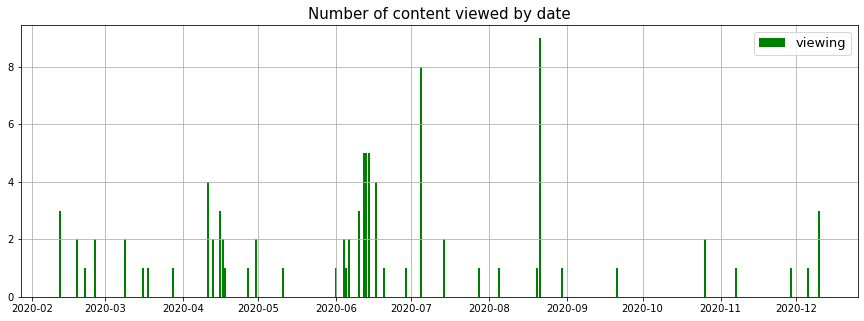

In [97]:
plt.figure(figsize=(15,5))
plt.title("Number of content viewed by date", fontsize=15)
plt.bar(recent_year_grp.index, recent_year_grp.values, color='green', label='viewing')
plt.grid()
plt.legend(fontsize=13)
# plt.xticks(rotation=90)
plt.show()

## 많이 본 장르